In [ ]:
"""
Zadanie 2.

Przygotuj chmurę słów (lub wykres kolumnowy dla 50 najczęściej używanych słów) w oparciu o *bag-of-words*. Dla pozyskanych przez Ciebie dokumentów (w języku angielskim). Korpus ma odzwierciedlać pewną dychotomię - konflikt, dyskusję dwóch stron pewnego zjawiska np: zmian klimatycznych, lockdownu, ulubionego sportu (rugby vs. piłka nożna). Mogą to być: teksty tweetów na wybrane tematy (min 1000 tweetów dla każdej strony); dwóch grup artykułów (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów); wypowiedzi dwóch ekspertów czy polityków (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów).

Analizę wykonaj w dwóch wersjach:

1. dwa teksty traktowane są osobno - jako dwa osobne korpusy, przygotuj dwie wizualizacje dla każdej strony osobno.
2. dwa teksty traktowane są jako jeden i wykonaj wizualizację prezentującą:

    - termów charakterystycznych dla każdej ze stron (termy pojawiające się w wypowiedziach jednej strony ale nie pojawiające się w wypowiedziach drugiej strony),
    - termów wspólnych dla dwóch stron (termy pojawiające się w wypowiedziach jednej i drugiej strony jednocześnie).
"""

In [3]:
import twint
import nest_asyncio
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('SnowballStemmer')

nest_asyncio.apply()

In [4]:
#Funkcja pobierająca dane za pomocą biblioteki twint
def get_data(query, limit):
    c = twint.Config()
    c.Search = query
    c.Lang = 'en'
    c.Limit = limit
    c.Pandas = True
    twint.run.Search(c)
    tweets = twint.storage.panda.Tweets_df
    return tweets

In [8]:
#Funkcja oczyszczająca tweety
def cleaned_tweets(tweet):
    # normalizacja tekstu
    temp = re.sub("\s{2,}", " ", tweet) #usunięcie podwójnych spacji
    temp = re.sub("(\r\n|\r|\n)", " ", temp) #usunięcie przerw między słowami, entery
    temp = temp.lower() #zamienia wszystkie znaki na małe litery
    temp = re.sub("rt", "", temp) #usunięcie retweetów
    temp = re.sub("&amp", "", temp) #usunięcie kodu htmlowego
    temp = re.sub("#[a-z,A-Z]*", "", temp) #usunięcie hasztagów
    temp = re.sub("@\w+", "", temp) #usunięcie wzmianek, oznaczeń, tagowań
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) #usunięcie urlów
    temp = re.sub("http(s?)([^ ]*)", "", temp) #usunięcie urlów
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) #usunięcie znaków specjalnych
    temp = re.sub("\d", "", temp) #usunięcie cyfr
    temp = re.sub("\s{2,}", " ", temp) #ponowne usunięcie podwójnych spacji
    temp = re.sub("[^\w\s]", "", temp) #usunięcie znaków specjalnych
    temp = temp.strip() #usunięcie spacji lub odstępów na końcach tekstu
    
    #usunięcie duplikatów ze zbioru
    words_set = set(temp.split())
    words_list = list(words_set)
    
    #tokenizacja
    tokens = nltk.word_tokenize(" ".join(words_list))
    
    #tworzenie listy stop słów
    stopwords = ["a", "able", "about", "across", "after", "all", "almost", "also", "am", "among", "an", "and", "any", "are", "as", "at", "be", "because", "been", "but", "by", "can", "cannot", "could", "dear", "did", "do", "does", "either", "else", "ever", "every", "for", "from", "get", "got", "had", "has", "have", "he", "her", "hers", "him", "his", "how", "however", "i", "if", "in", "into", "is", "it", "its", "just", "least", "let", "like", "likely", "may", "me", "might", "most", "must", "my", "neither", "no", "nor", "not", "of", "off", "often", "on", "only", "or", "other", "our", "own", "rather", "said", "say", "says", "she", "should", "since", "so", "some", "than", "that", "the", "their", "them", "then", "there", "these", "they", "this", "tis", "to", "too", "twas", "us", "wants", "was", "we", "were", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "would", "yet", "you", "your"]
    stopwords = stopwords + ["brexit", "remain", "s", "t", " ", "ga", "po", "yr", "b", "“", "”"]
    temp = " ".join([word for word in temp.split() if word not in stopwords])
    
    #stemming
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(token) for token in tokens if not token in stopwords]
    
    return stemmed_tokens

In [6]:
# Definicja funkcji generującej chmurę słów
def generate_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
    wordcloud.generate(data)
    plt.figure(figsize = (8, 8), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [7]:
# pobranie tweetów na temat Brexitu
brexit_tweets = get_data("Brexit", 1000)
# pobranie tweetów na temat zostania w UE
remain_tweets = get_data("Remain", 1000)

1643364595300716546 2023-04-04 23:27:06 +0200 <audiodrum> @blashdril Brexit.
1643364548080988160 2023-04-04 23:26:55 +0200 <S34N_XCIV> Brexit may finally have its first benefit! 🤭
1643364546004807682 2023-04-04 23:26:54 +0200 <jay5672> @noel_sergeant @TerraOrBust The positive story for me, apart from the prospect of the CPTPP and other deals such as with India, is how UK exports overall are doing better than Germany/France despite Brexit. That has left remainers economist experts scratching their heads, no doubt.
1643364538316734465 2023-04-04 23:26:52 +0200 <_AnthonyByrne> Brexit Regret Caller Tells James O'Brien He Is Bitterly Sorry!  https://t.co/w4tSxxRS4p via @YouTube  @Nigel_Farage @Jacob_Rees_Mogg. Well done and thank you to Tony who admitted he made the mistake by voting for Brexit in 2016 and how much we were scammed by the leave campaigners
1643364523565252610 2023-04-04 23:26:49 +0200 <giraffeonastick> @Lynn_Nothegger Fecking Brexit. That's all I can say.
1643364504091213824

In [9]:
# oczyszczenie tweetów na temat Brexit
brexit_cleaned_tweets = [cleaned_tweets(tweet) for tweet in brexit_tweets["tweet"]]
# oczyszczenie tweetów na temat Remain
remain_cleaned_tweets = [cleaned_tweets(tweet) for tweet in remain_tweets["tweet"]]

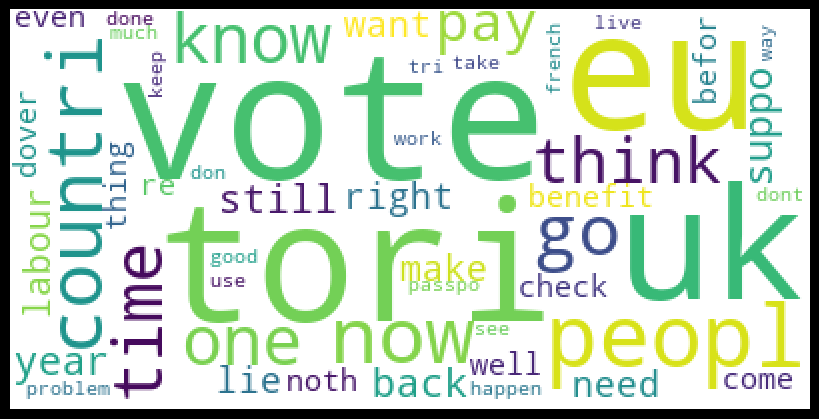

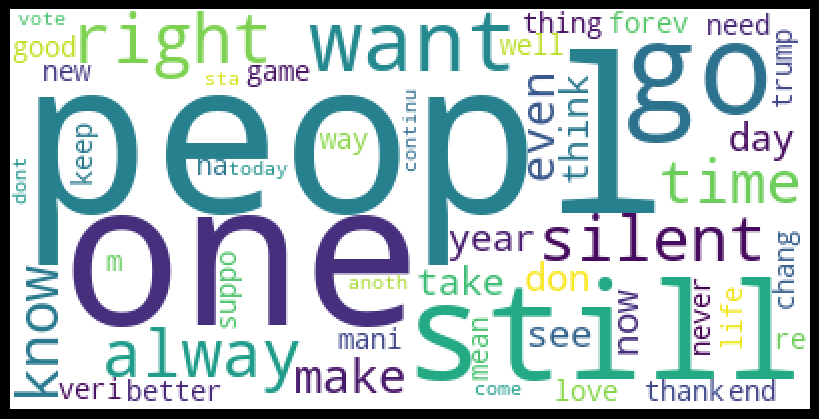

In [10]:
# stworzenie jednego tekstu na temat Brexit
brexit_text = " ".join([" ".join(tweet) for tweet in brexit_cleaned_tweets])
# stworzenie jednego tekstu na temat Remain
remain_text = " ".join([" ".join(tweet) for tweet in remain_cleaned_tweets])

# generowanie chmur słów
generate_wordcloud(brexit_text) # chmura słów dla Brexit
generate_wordcloud(remain_text) # chmura słów dla Remain

In [11]:
def count_words(text):
    word_counts = {}
    for tweet in text:
        for word in tweet:
            if word not in word_counts:
                word_counts[word] = 1
            else:
                word_counts[word] += 1
    return word_counts

        Word  Count
29      vote    105
89      tori     88
116       eu     85
4         uk     76
61     peopl     68
245      now     56
67      more     54
314       up     53
147  countri     50
233     make     50
103      out     48
164      pay     46
125       go     45
286     work     43
292     want     42
194     time     41
170     know     40
184      one     40
200     year     39
106    think     39
219    suppo     38
173   govern     38
406    still     38
201     back     37
165   labour     36
362     need     36
611     over     36
105    right     36
179  british     35
134      lie     35
123     good     33
0    benefit     33
441    dover     31
28      well     30
157    check     30
185       re     30
104     noth     29
450    trump     29
117     even     29
196     come     29
259   happen     29
120    thing     29
156    befor     29
76       use     28
438     here     28
840      tri     27
801       be     27
365      don     27
98      take     27


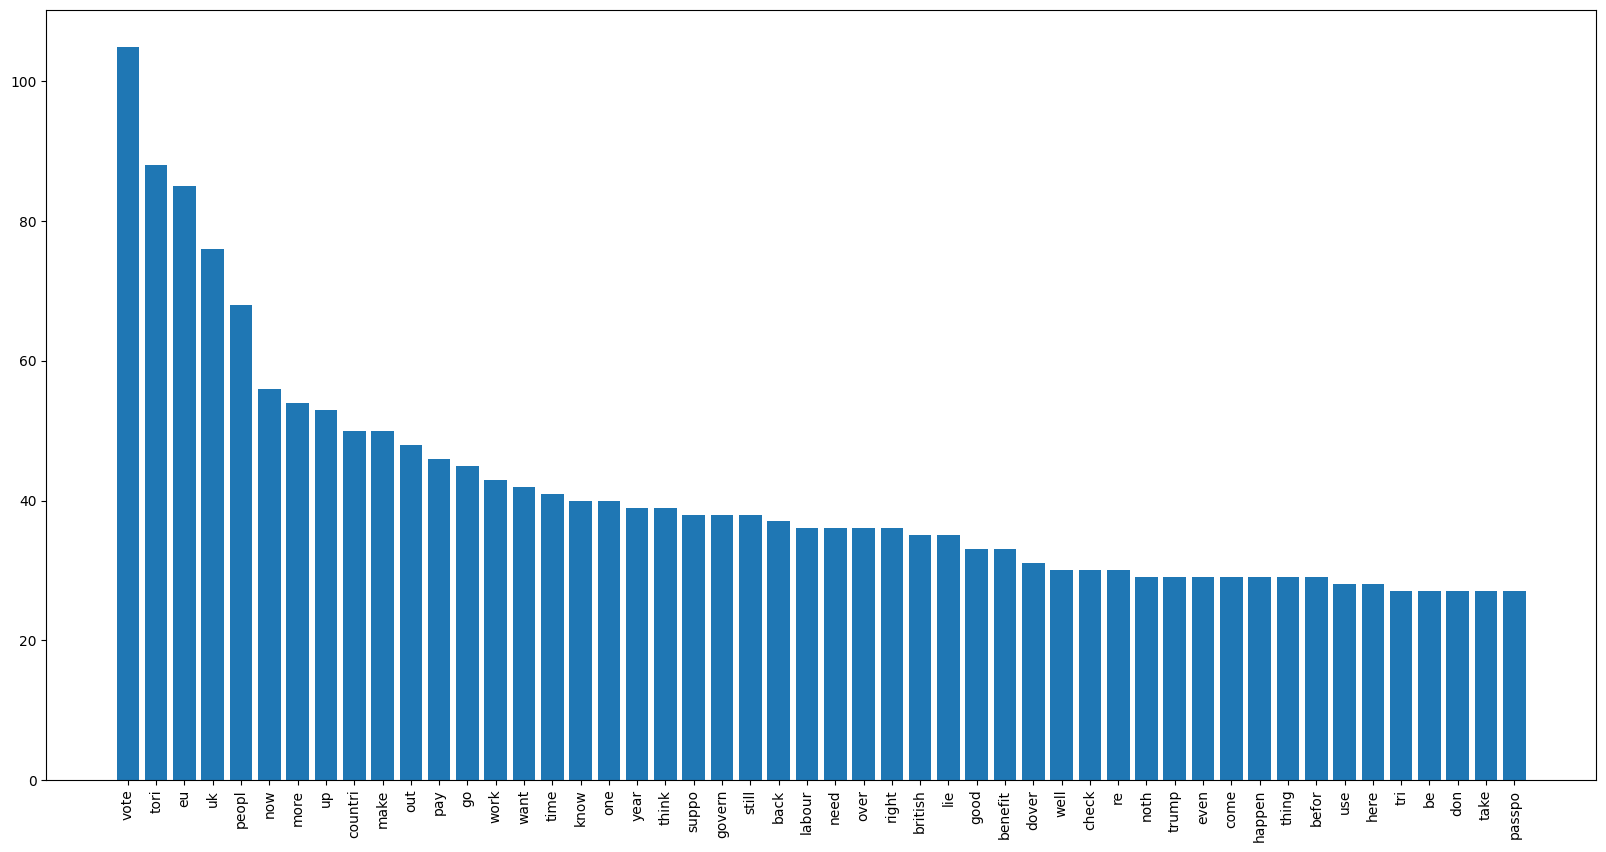

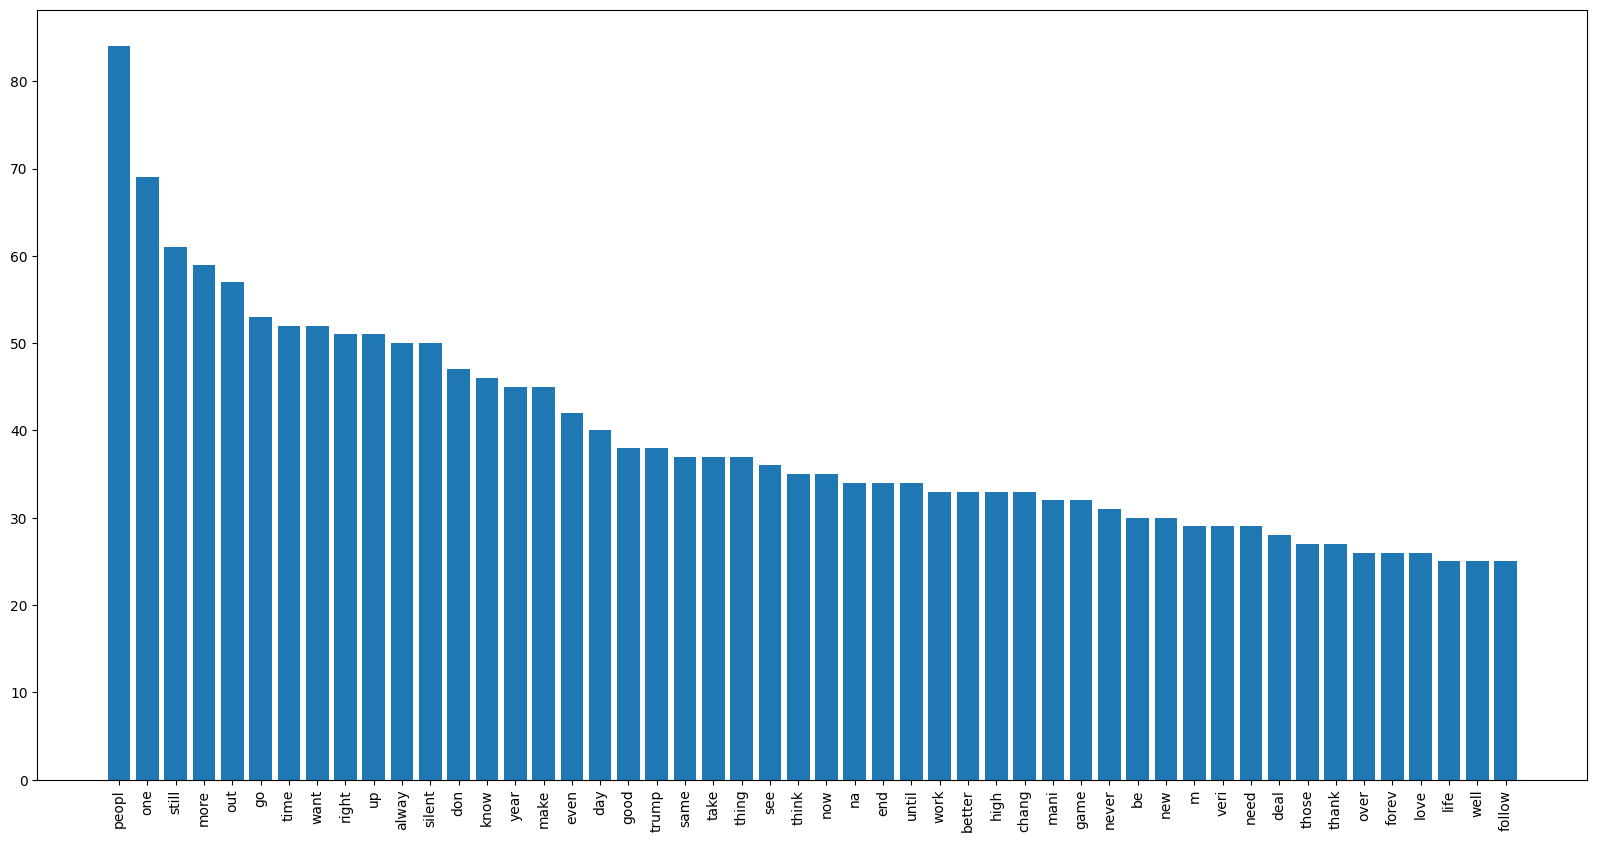

In [12]:
# policzenie słów dla Brexit
brexit_word_counts = count_words(brexit_cleaned_tweets)
# policzenie słów dla Remain
remain_word_counts = count_words(remain_cleaned_tweets)

# wyświetlenie 50 najczęściej używanych słów dla Brexit
brexit_top_50 = pd.DataFrame(list(brexit_word_counts.items()),columns = ['Word','Count']).sort_values(by=['Count'], ascending=False).head(50)
print(brexit_top_50)

# wyświetlenie 50 najczęściej używanych słów dla Remain
remain_top_50 = pd.DataFrame(list(remain_word_counts.items()),columns = ['Word','Count']).sort_values(by=['Count'], ascending=False).head(50)
print(remain_top_50)

# wykres kolumnowy dla 50 najczęściej używanych słów dla Brexit
plt.figure(figsize=[20,10])
plt.bar(brexit_top_50["Word"], brexit_top_50["Count"])
plt.xticks(rotation=90)
plt.show()

# wykres kolumnowy dla 50 najczęściej używanych słów dla Remain
plt.figure(figsize=[20,10])
plt.bar(remain_top_50["Word"], remain_top_50["Count"])
plt.xticks(rotation=90)
plt.show()

In [13]:
#Rozbicie tweetów dotyczących Brexitu i pozostania w UE na pojedyncze słowa

brexit_words = set(brexit_text.split())
remain_words = set(remain_text.split())

In [14]:
#Różnice zbiorów

diff_words1 = brexit_words - remain_words
diff_words2 = remain_words - brexit_words

In [15]:
#Część wspólna zbiorów

common_words = brexit_words.intersection(remain_words)

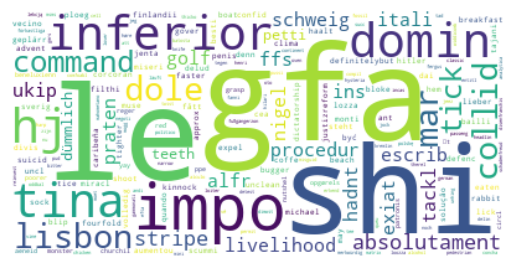

In [16]:
#CHmura słów dla zbioru Brexit\Remain

wordcloud = WordCloud(background_color="white").generate(" ".join(diff_words1))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

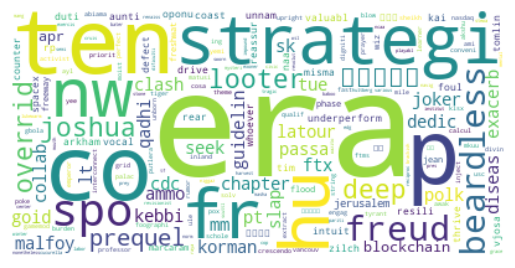

In [17]:
#Chmura słów dla zbioru Remain\Brexit

wordcloud = WordCloud(background_color="white").generate(" ".join(diff_words2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

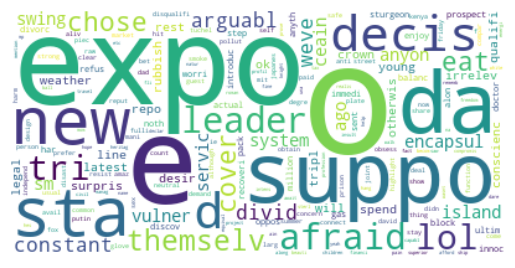

In [18]:
#Chmura słów dla części wspólnej z obu zbiorów

wordcloud = WordCloud(background_color="white").generate(" ".join(common_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()